# Assignment 2.1

**Problem Statement**
Build a CNN for Cifar10 data

**Data:** from keras.datasets import cifar10 https://www.cs.toronto.edu/~kriz/cifar.html

**Task:**
1. Load the cifar10 data
2. Display 10 random cifar images in one grid (subplots)
3. Build 2 Conv2D layer with 2 MaxPooling2D, filter 64, and 32 respectively, padding true, activation relu, kernel size (3, 3), stride for Conv2d will be 1, for maxpool stride 2
4. Use RMSprop optimizer, sparse categorical loss, and accuracy, epochs 10
5. Calculate test set accuracy score and log loss, build confusion matrix
6. Display 10 random test set cifar images with actual and predicted value (use word cifar labels)
7. Justify on paper the estimation of trainable parameters of the model (refer summary)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss

from keras.datasets import cifar10

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(np.unique(y_train))
print(len(y_train))

[0 1 2 3 4 5 6 7 8 9]
50000


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
labels = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat',
          4:'Deer', 5:'Dog',6:'Frog',
          7:'Horse', 8:'Ship', 9:'Truck'
        }

### Visualizing training images 

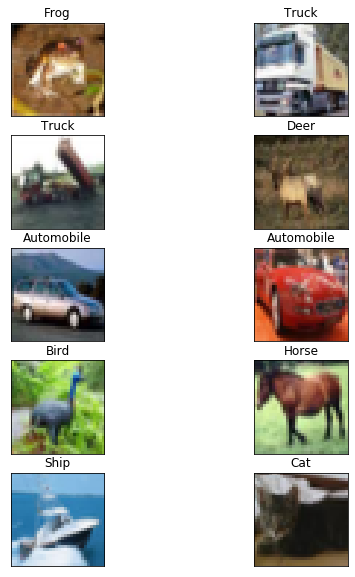

In [6]:
plt.figure(figsize=(8,10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
    
#  print(y_train[i])
plt.show()

### Normalizing images

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
tf.keras.backend.clear_session()

### Model Building

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [11]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics = ["accuracy"]) 

In [12]:
history = model.fit(x_train, y_train, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 76s 2ms/sample - loss: 1.7045 - accuracy: 0.3834
Epoch 2/10
50000/50000 [==============================] - 76s 2ms/sample - loss: 1.3010 - accuracy: 0.5585
Epoch 3/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.1464 - accuracy: 0.6169
Epoch 4/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.0756 - accuracy: 0.6460
Epoch 5/10
50000/50000 [==============================] - 124s 2ms/sample - loss: 1.0479 - accuracy: 0.6572
Epoch 6/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.0567 - accuracy: 0.6640
Epoch 7/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.0440 - accuracy: 0.6690
Epoch 8/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.0567 - accuracy: 0.6670
Epoch 9/10
50000/50000 [==============================] - 76s 2ms/sample - loss: 1.0840 - accuracy: 0.6601
Epoch 10/10
5

### Model Performance

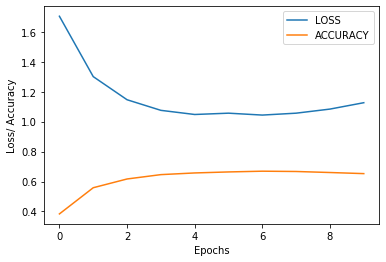

In [13]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['accuracy'], label="ACCURACY")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Accuracy')

plt.legend(loc='best')
plt.show()

In [14]:
prob = model.predict(x_test)
pred = np.argmax(prob, axis=1)

In [15]:
print(accuracy_score(y_test, pred))

0.6145


In [16]:
y_test=y_test.astype('float')
print(log_loss(y_test, prob))

1.1865373175241216


In [17]:
confusion_matrix(y_test,pred)

array([[484,   8,  93,  50,  10,   6,  40,   5,  42, 262],
       [  3, 695,   2,  12,   0,   7,  31,   0,   6, 244],
       [ 26,   2, 403,  91,  57, 120, 257,  13,   4,  27],
       [  3,   1,  21, 557,  22, 155, 188,  14,   2,  37],
       [ 11,   1,  33, 132, 449,  50, 267,  34,   8,  15],
       [  4,   0,  11, 291,  23, 531, 113,  10,   4,  13],
       [  1,   0,   7,  56,   8,   7, 898,   3,   1,  19],
       [  2,   0,   9, 103,  36, 151,  74, 589,   2,  34],
       [ 31,  41,   7,  34,   1,   5,  48,   1, 659, 173],
       [  1,  40,   4,  26,   0,  10,  23,   8,   8, 880]], dtype=int64)

### Predictions

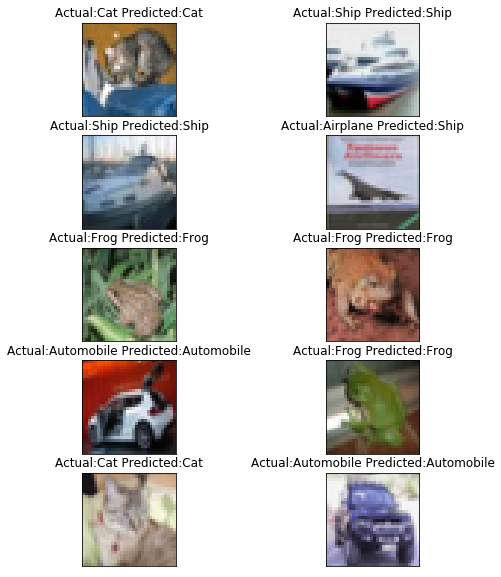

In [18]:
plt.figure(figsize=(8,10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(x_test[i])
    string = "Actual:"+ labels[y_test[i][0]] + " Predicted:" + labels[pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
    
plt.show()